#Método de la transformada inversa
Teorema: Sea $U$ una variable uniforme en $(0,1)$. Para cualquier función de distribución continua $F$, invertible, la variable aleatoria $X$ definida como
$$X=F^{-1}(U)$$
tiene distribución $F$

##Ejemplo
$$f(x)\begin{cases}
\frac{5}{4} -x \ &\text{si } 0 \leq x < 1 \\
\frac{1}{4} \ &\text{si } 1 \leq x \leq 2 \\
\ 0 \ &\text{en otro caso }
\end{cases}$$

1. Demostramos que $f(x)\geq 0$ \
Esto se puede ver fácilmente con la gráfica


In [1]:
#Importamos las librerías a ocupar
import random as rnd
import numpy as np
import matplotlib.pyplot as plt

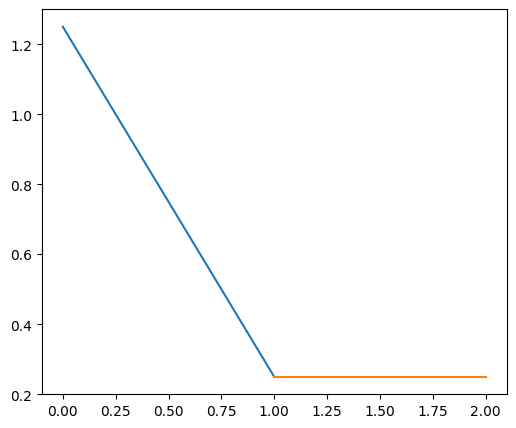

In [7]:
x_1=np.linspace(0,1,100) #rango en x de [0,1)
x_2=np.linspace(1,2,100) #rango en x de [1,2]

y_1=(5/4)-x_1 #Funció correspondiente al primer intervalo
y_2=np.full_like(x_2,1/4) #Función constante

plt.figure(figsize=(6,5)) #Crear figura
plt.plot(x_1,y_1) #Grafica función 1
plt.plot(x_2,y_2) #Gráfica de la funcion constante
plt.show()

Como se puede observar, $f(x)$ es positiva a lo largo del intervalo $[0,2]$ \
2. Demostrar que es una función de densidad, es decir
$$\int_{-∞}^∞f(x)dx=1 $$
$$\int_0^1 (\frac{5}{4}-x) dx + \int_{1}^{2} \frac{1}{4} dx= [\frac{5}{4}x-\frac{x^2}{2}]_0^1 + [\frac{1}{4}x]_1^2$$
$$=\frac{3}{4} + \frac{1}{4}=1$$
3. Ahora obtenemos su función de densidad **acumulada**, usando la definición:
$$F(x) = \int_{-∞}^{x}f(s)ds$$
Integramos en cada intervalo
$$F(x)= \int_0^1 (\frac{5}{4}-s) ds = [\frac{5}{4}s-\frac{s^2}{2}]_0^x$$
Para el intervalo $1\leq x \leq 2$ necesitamos calcular $F(1)$ para usarlo como constante de acumulación:
$$\frac{5}{4}(1)x-\frac{1^2}{2}=\frac{3}{4}$$
Así
$$F(x)= F(1) + \int_{1}^{x} \frac{1}{4} ds = \frac{3}{4} + [\frac{1}{4}s]_1^x$$
$$=\frac{3}{4} + \frac{1}{4}x-\frac{1}{4}=\frac{1}{4}x+\frac{1}{2}$$
\
$$F(x)\begin{cases}
\frac{5}{4}x-\frac{x^2}{2} \ &\text{si } 0 \leq x < 1 \\
\frac{1}{4}x+\frac{1}{2} \ &\text{si } 1 \leq x \leq 2 \\
\end{cases}$$


4. Calcular $F^{-1}$ \
Recordar $F^{-1}$ se define como el valor de $x$ tal que $F(x)=u$ \
Para generar $x$, resolvemos para x la ecuación: \
Resolver $F(x)=R$
$$R=\frac{5}{4}x-\frac{x^2}{2}$$
$$x=\frac{3}{4}+\sqrt{\frac{25}{16}-2R}$$
$$x=\frac{3}{4}+\sqrt{\frac{25}{16}-2u}$$
\
Resolver $F(x)=R$
$$R=\frac{1}{4}x+\frac{1}{2}$$
$$x=4R-2$$
$$x=4u-2$$
\
El eje donde se tomará los intervalos, es en el eje $y$, es decir de $[0,1]$. Quedando
$$F^{-1}(u)\begin{cases}
\frac{3}{4}+\sqrt{\frac{25}{16}-2u} \ &\text{si } 0 \leq x < \frac{3}{4} \\
4u-2 \ &\text{si } \frac{3}{4} \leq x \leq 1 \\
\end{cases}$$


In [8]:
def F_inversa(n): #Esta función devuelve una lista con valores de x de la función inversa
 lista=[]
 for i in range(n):
  u=rnd.random() #Genera un número aleatorio entre 0 y 1
  if 0<=u<3/4: #primer intervalo
   x=(5/4)-((25/16 -2*u)**(1/2))
   lista.append(x)
  else: #segundo intervalo
   x=(4*u)-2
   lista.append(x)
 return lista

In [12]:
G=F_inversa(10000) #Genera 10000 valores de x de la función inversa

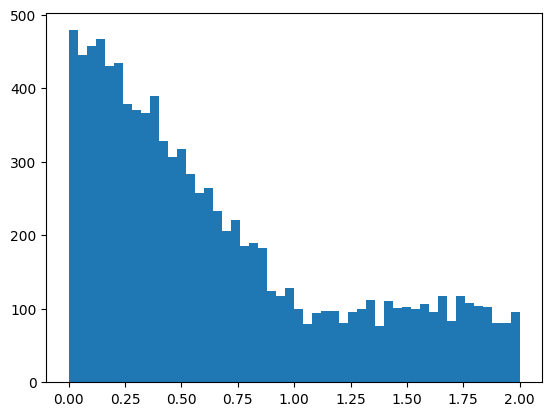

In [13]:
plt.hist(G,bins=50) #Histograma de G el cual tiene que tener una forma similar
            # a la función de densidad
plt.show()

In [14]:
def cdf(G): #Función de distribución acumulada
 n=len(G)
 x=np.sort(G) #Ordenamos los datos
 y=np.arange(0,n)/n
 return x,y

In [15]:
x,y=cdf(G) #Calculamos la distribución acumulada

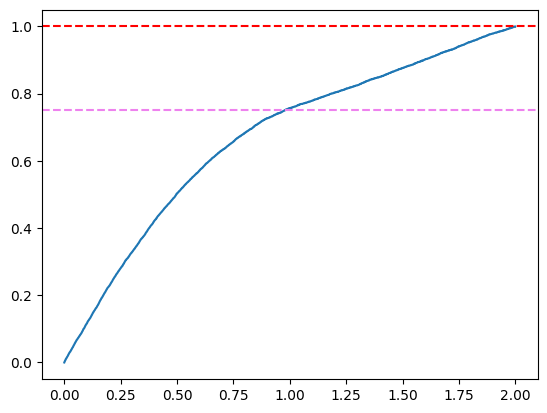

In [18]:
plt.step(x,y) #Gráfica de la distribución acumulada
plt.axhline(y=1, color='r', linestyle='--') #Valor máximo de la distribución acumulada
plt.axhline(y=3/4, color='violet', linestyle='--') #valor extremo del primer intervalo
plt.show()